In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = r'C:\Users\sonak\Downloads\loan\loan.csv' 
loan_data = pd.read_csv(file_path, low_memory=False)

In [4]:
# Data Cleaning

# Dropping columns with more than 50% missing values
missing_threshold = 0.5 
missing_values_percent = loan_data.isnull().mean()
columns_to_drop = missing_values_percent[missing_values_percent > missing_threshold].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

In [5]:
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.rstrip('%').astype('float')

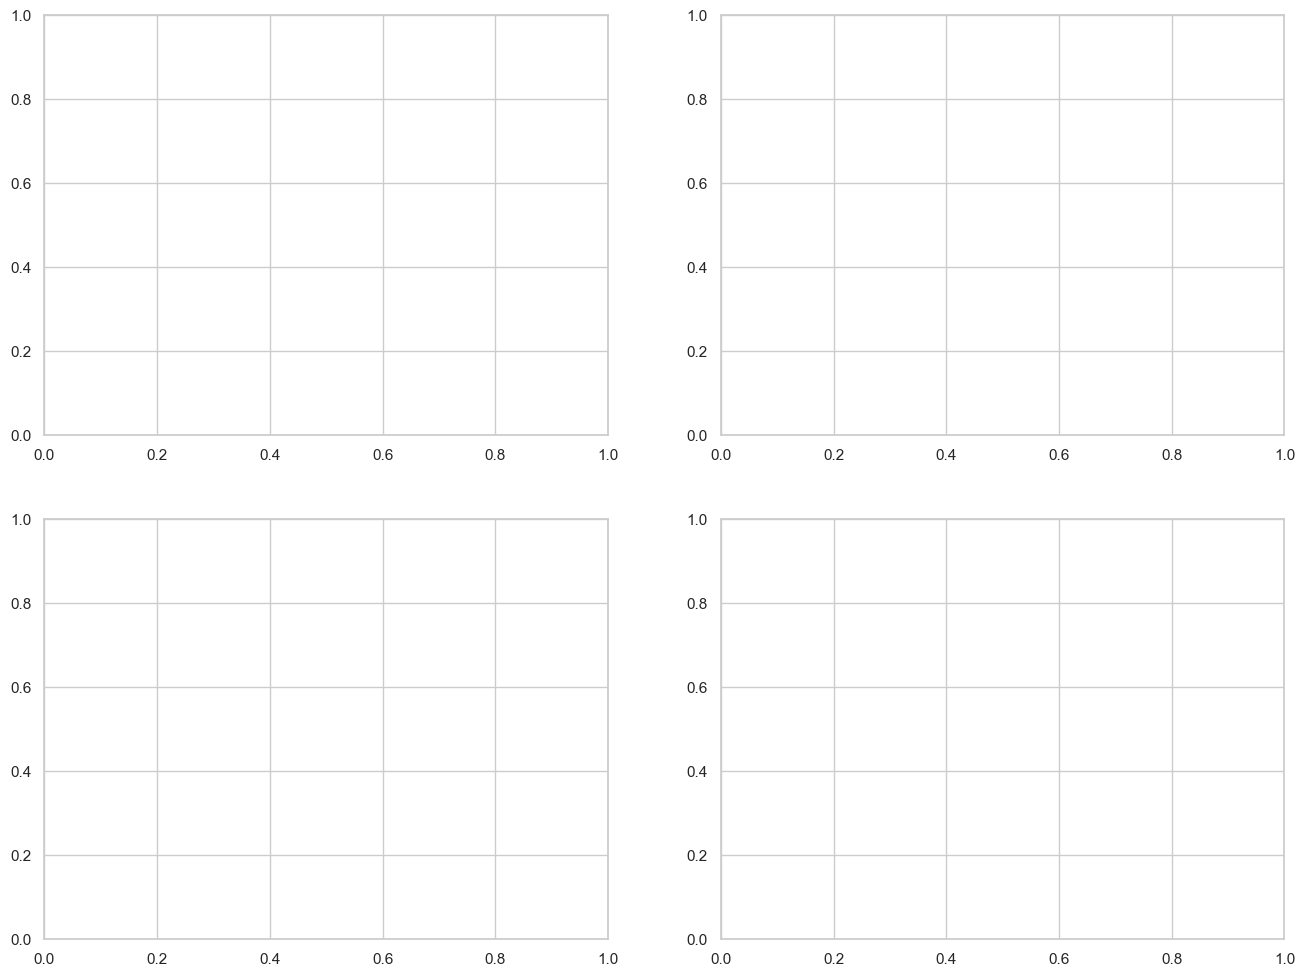

In [11]:
# Univariate Analysis
# visualization
sns.set(style="whitegrid")
# Plotting key variables to understand their distribution
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

In [12]:
# Loan Amount Distribution
sns.histplot(loan_data_cleaned['loan_amnt'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Loan Amount')
axs[0, 0].set_xlabel('Loan Amount')
axs[0, 0].set_ylabel('Frequency')

C:\Users\sonak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(4.444444444444459, 0.5, 'Frequency')

In [8]:
# Interest Rate Distribution
sns.histplot(loan_data_cleaned['int_rate'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Interest Rate')
axs[0, 1].set_xlabel('Interest Rate (%)')
axs[0, 1].set_ylabel('Frequency')

C:\Users\sonak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(680.8080808080806, 0.5, 'Frequency')

In [15]:
# Annual Income Distribution (considering values less than 200,000 for better visualization)
filtered_annual_inc = loan_data_cleaned[loan_data_cleaned['annual_inc'] < 200000]['annual_inc']
sns.histplot(filtered_annual_inc, bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Annual Income')
axs[1, 0].set_xlabel('Annual Income')
axs[1, 0].set_ylabel('Frequency')

C:\Users\sonak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(4.444444444444459, 0.5, 'Frequency')

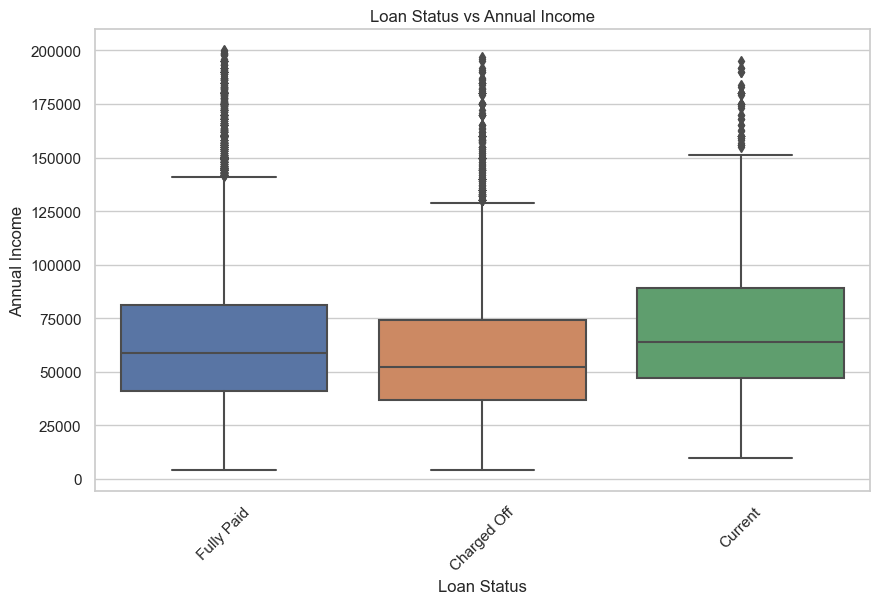

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_data[loan_data['annual_inc'] < 200000])  # Filter extreme values for clarity
plt.title('Loan Status vs Annual Income')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()
